## Die Studentsche-t-Verteilung in Python
----------------------------------------

In [1]:
from scipy.stats import t
import matplotlib.pyplot as plt
import numpy as np

%run ../src/notebook_env.py


---------------------------------
Working on the host: LAPTOP-9LETB4SJ

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Mar  8 2022, 15:52:24) [MSC v.1929 64 bit (AMD64)]

---------------------------------
Python interpreter: C:\Users\zak\anaconda3\envs\srh\python.exe


Python ermöglicht den Zugriff auf die $t$-Verteilung mit den Funktionen `t.pdf()`, `t.cdf()`, `t.ppf()` und `t.rvs()`. Wenden Sie die Funktion dir() auf diese Funktionen an, um weitere Informationen zu erhalten.

Die Funktion `t.rvs()` erzeugt Zufallsabweichungen der $t$-Verteilung und wird als`t.rvs(df, loc , scale, size)` geschrieben. Wir können leicht eine Anzahl von $n$ Zufallsstichproben erzeugen. Erinnern Sie sich daran, dass die Anzahl der Freiheitsgrade für eine $t$-Verteilung gleich dem Stichprobenumfang minus eins ist, d.h.,


In [2]:

#generate random values from t distribution with df=6 and sample size=10
t.rvs(df=29, size=30)

array([ 0.0061739 ,  0.55180213, -0.76946547,  0.76033649,  1.24963869,
        1.34699974,  1.02879185,  0.5609624 , -0.13815923, -2.40038689,
       -1.73551914, -1.15553453,  1.78711267, -0.93196147,  0.85081401,
       -1.02279884,  0.89624369, -0.45768448,  0.13001546,  0.77202369,
        1.61255777,  0.4915177 ,  0.36381058,  0.77581256,  0.80591376,
        1.12163412,  0.71328043,  2.25636393,  0.10138747, -0.24512131])

Außerdem können wir eine sehr große Anzahl von Stichproben erzeugen und sie als Histogramm darstellen.


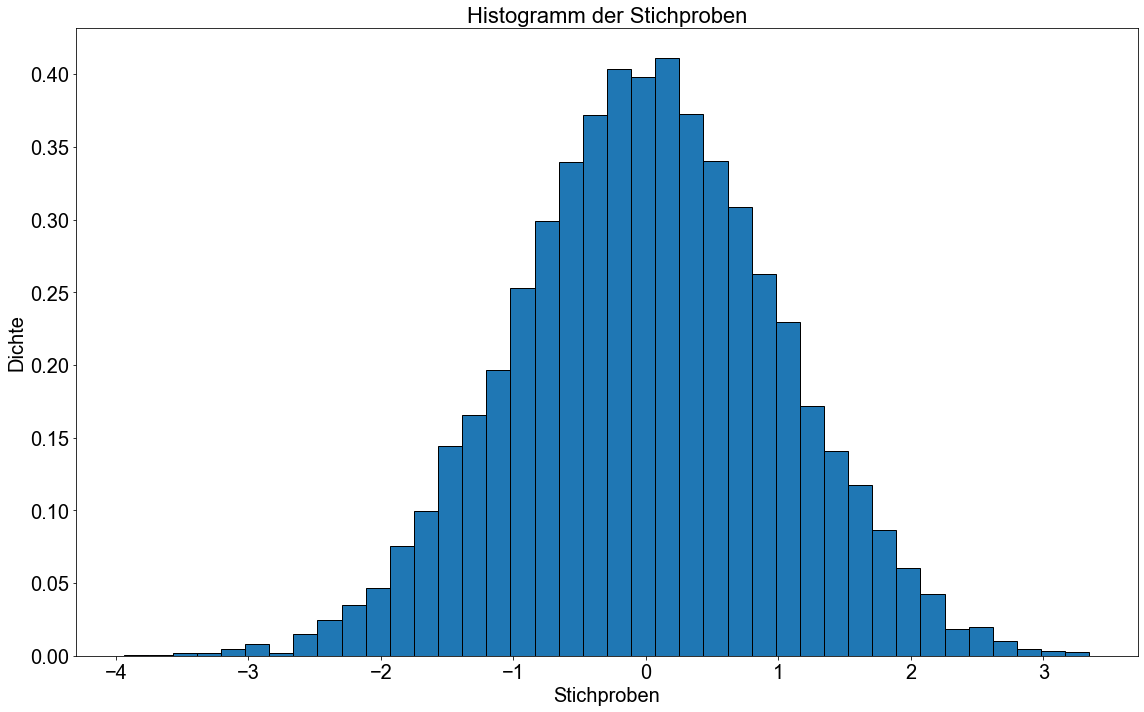

In [3]:
# Erzeuge zufallwerte der t distribution mit df=9999 und sample size=10000
y = t.rvs(df=9999, size=10000)

fig, ax1 = plt.subplots()

ax1.set_title('Histogramm der Stichproben')
ax1.set_xlabel('Stichproben')
ax1.set_ylabel('Dichte')
ax1.hist(y,bins=40,density = True, edgecolor='k')

fig.tight_layout()

plt.show() 

Mit der Funktion `t.pdf()` können wir die Wahrscheinlichkeitsdichtefunktion und damit den vertikalen Abstand zwischen der horizontalen Achse und der $t$-Kurve an jedem beliebigen Punkt berechnen. Zur Demonstration konstruieren wir eine $t$-Verteilung mit $df=5$ und berechnen die Wahrscheinlichkeitsdichtefunktion bei $t=-4,-2,0,2,4$.

In [62]:
x = list(range(-4,5,2))
y_t = t.pdf(x,df = 5)

array([0.00512373, 0.06509031, 0.37960669, 0.06509031, 0.00512373])

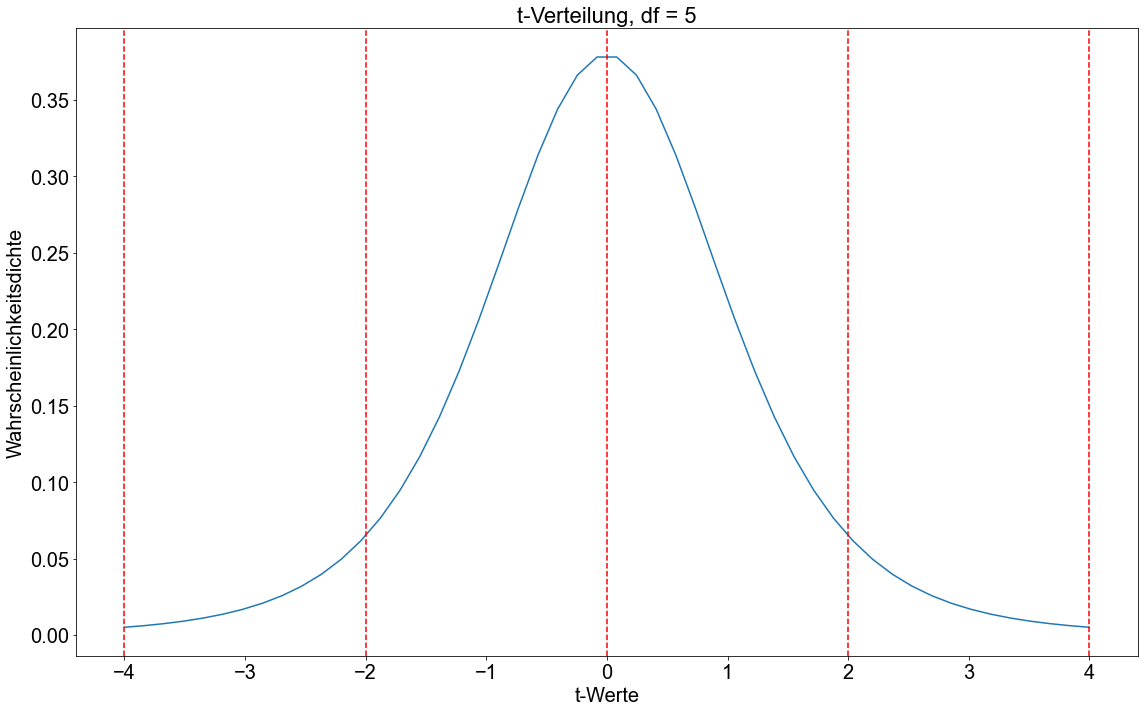

In [4]:
# Erzeuge x-werte
x = np.linspace(-4,4,num = 50)

# Plotte t-Verteilung
fig, ax1 = plt.subplots()

ax1.set_title('t-Verteilung, df = 5')
ax1.set_xlabel('t-Werte')
ax1.set_ylabel('Wahrscheinlichkeitsdichte')
ax1.plot(x,t.pdf(x,df = 5))
ax1.axvline(x=0, color='r', ls = '--',label='Erwartungswert : 0')
ax1.axvline(x=2, color='r', ls = '--',label='Erwartungswert : 0')
ax1.axvline(x=-2, color='r', ls = '--',label='Erwartungswert : 0')
ax1.axvline(x=4, color='r', ls = '--',label='Erwartungswert : 0')
ax1.axvline(x=-4, color='r', ls = '--',label='Erwartungswert : 0')
fig.tight_layout()

plt.show() 

Eine weitere sehr nützliche Funktion ist die Funktion `t.cdf()`, die die Fläche unter der $t$-Kurve für ein beliebiges Intervall liefert. Berechnen wir die Fläche unter der Kurve für die Intervalle $j_i=]-\infty \ $,$ \ -2],]-\infty \ $,$ \ 0],]-\infty \ $,$ \ 2]$ und $k_i=[-2 \ $,$ \ \infty[,[0 \ $,$ \ \infty[,[2 \ $,$ \ \infty[$ für eine Zufallsvariable mit einer $t$-Verteilung mit $df=5$.

In [92]:
# Berechne kumulitative Wahrscheinlichkeit links von Wert x
for i in range(-2,3,2):
    print(t.cdf(i, df = 5),'Wert für Fläche links von :',i)

0.05096973941492914 Wert für Fläche links von : -2
0.5 Wert für Fläche links von : 0
0.9490302605850709 Wert für Fläche links von : 2


![Alt-Text](tdist2.png)

In [93]:
# Berechne kumulitative Wahrscheinlichkeit rechts von Wert x
for i in range(-2,3,2):
    print(1-t.cdf(i, df = 5),'Wert für Fläche rechts von :',i)

0.9490302605850709 Wert für Fläche rechts von : -2
0.5 Wert für Fläche rechts von : 0
0.050969739414929105 Wert für Fläche rechts von : 2


![Alt-Text](tdist3.png)

Die Funktion `t.ppf()` liefert die Quantilfunktion und ist damit die Umkehrfunktion von `t.cdf()`. Für die Intervalle $j_i= ]-\infty \ $,$ \ -2],]-\infty \ $,$ \ 0],]-\infty \ $,$ \ 2]$ einer Zufallsvariablen, die einer $t$-Verteilung mit $df=5$ folgt, liefert die Funktion `t.ppf()`...

In [121]:
x_ppf=[]
# Berechne kumulitative Wahrscheinlichkeit links von Wert x
for i in range(-2,3,2):
    print(t.cdf(i, df = 5),'Wert für Fläche links von :',i)
    x_ppf.append(t.cdf(i, df = 5))

0.05096973941492914 Wert für Fläche links von : -2
0.5 Wert für Fläche links von : 0
0.9490302605850709 Wert für Fläche links von : 2


In [ ]:
x_ppf

[0.05096973941492914, 0.5, 0.9490302605850709]

In [123]:
print(t.ppf(x_ppf, df = 5))

[-2.00000000e+00  6.97600362e-17  2.00000000e+00]


... und für die Intervalle $k_i=[-2 \ $,$ \ \infty[,[0 \ $,$ \ \infty[,[2 \ $,$ \ \infty[$ einer Zufallsvariablen, die einer $t$-Verteilung mit $df=5$ folgt, liefert die Funktion `t.ppf`

In [124]:
x_ppf=[]
# Berechne kumulitative Wahrscheinlichkeit links von Wert x
for i in range(-2,3,2):
    print(1-t.cdf(i, df = 5),'Wert für Fläche links von :',i)
    x_ppf.append(1-t.cdf(i, df = 5))

0.9490302605850709 Wert für Fläche links von : -2
0.5 Wert für Fläche links von : 0
0.050969739414929105 Wert für Fläche links von : 2


In [125]:
x_ppf

[0.9490302605850709, 0.5, 0.050969739414929105]

In [138]:
t_ppf=t.ppf(x_ppf, df = 5)
t_ppf

array([ 2.00000000e+00,  6.97600362e-17, -2.00000000e+00])

In [137]:
# Runde Ergebnis
t_ppf = [round(x) for x in t_ppf]
t_ppf

[2, 0, -2]